In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional, TimeDistributed
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
#from pycm import ConfusionMatrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import RandomOverSampler  # For class imbalance handling
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
import csv

In [ ]:
# Load dataset and labels
data = pd.read_csv('/content/drive/MyDrive/ARP_MitM_dataset.csv')
label = pd.read_csv('/content/drive/MyDrive/ARP_MitM_labels.csv')


In [ ]:
# Remove the extra row from the label dataset
label = label.iloc[:-1]

# Now both datasets should have the same number of samples
print("Number of samples in data:", data.shape[0])
print("Number of samples in label:", label.shape[0])

# Select a subset of the data and labels (50000 samples)
dataArr = data[:25000]
dataArr2 = data[-25000:]
label = label.drop(label.columns[label.columns.str.contains('unnamed', case=False)], axis=1)
labelArr = label[:25000]
labelArr2 = label[-25000:]

# Concatenate the data and labels
labelArr = pd.concat([labelArr, labelArr2])
dataArr = pd.concat([dataArr, dataArr2])

# Print the shapes of the data and labels
print(dataArr.shape)
print(labelArr.shape)

Number of samples in data: 2504266
Number of samples in label: 2504266
(50000, 115)
(50000, 1)


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(dataArr, labelArr, test_size=0.40, random_state=42)

In [ ]:
# Handling class imbalance with oversampling
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)


In [ ]:
# Standardize features
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

In [ ]:
X_train=np.load('/content/drive/MyDrive/X_train_resampled.npy')
X_test=np.load('/content/drive/MyDrive/X_test_sampled.npy')
y_train=np.load('/content/drive/MyDrive/y_train_resampled.npy')
y_test=np.load('/content/drive/MyDrive/y_test.npy')


In [ ]:
def eval_metrics(y_test,y_pred,classifier):
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Print the metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Confusion Matrix:\n", conf_matrix)
    # Store metrics in a CSV file (append mode)
    metrics_list = [accuracy, precision, recall, f1,conf_matrix,classifier]
    with open('/content/drive/MyDrive/metrics.csv', mode='a', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(metrics_list)
    # Create a confusion matrix
    # Print the confusion matrix
    print("Confusion Matrix:")
    # Plot the confusion matrix as a heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

In [ ]:
!pip install pycm==4.0


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.3/70.3 kB 653.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 599.8/599.8 kB 18.6 MB/s eta 0:00:00


# **Define and Train the Models**

**1) Bidirectional LSTM:**

In [ ]:
# Function to create and train a Bidirectional LSTM model
def train_bidirectional_lstm(X_train, y_train, X_test, y_test):
    verbose, epochs, batch_size = 1, 5, 32
    n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train.shape[1]

    model = Sequential()
    model.add(Bidirectional(LSTM(70, return_sequences=True), input_shape=(n_timesteps, 1)))
    model.add(TimeDistributed(Dense(1, activation='sigmoid')))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    model_history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=verbose, validation_data=(X_test, y_test))

    # Evaluate the Bidirectional LSTM model
    loss_lstm, accuracy_lstm = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=1)
    score_lstm = accuracy_lstm * 100.0
    print("Bidirectional LSTM Accuracy:", score_lstm)

    # Predict labels using the trained model
    predicted_labels = model.predict(X_test)

    return predicted_labels, model_history

# Example usage
predicted_labels, model_history = train_bidirectional_lstm(X_train_model, y_train, X_test_model, y_test)

Epoch 1/5
938/938 [==============================] - 21s 17ms/step - loss: 0.1354 - accuracy: 0.9552 - val_loss: 0.0376 - val_accuracy: 0.9998
Epoch 2/5
938/938 [==============================] - 14s 15ms/step - loss: 0.0374 - accuracy: 0.9983 - val_loss: 0.0103 - val_accuracy: 0.9999
Epoch 3/5
938/938 [==============================] - 14s 14ms/step - loss: 0.0074 - accuracy: 0.9999 - val_loss: 0.0033 - val_accuracy: 0.9999
Epoch 4/5
938/938 [==============================] - 16s 17ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 5/5
625/625 [==============================] - 3s 5ms/step - loss: 0.0141 - accuracy: 1.0000
Bidirectional LSTM Accuracy: 99.99765753746033
625/625 [==============================] - 4s 5ms/step


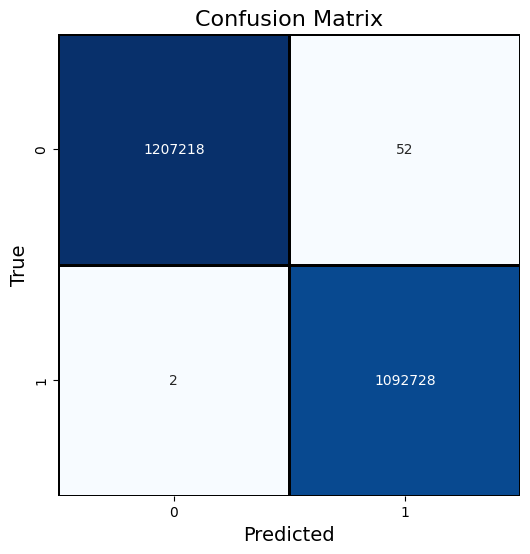

Accuracy: 0.9999765217391304
Precision: 0.9999524149417083
Recall: 0.9999981697217062
F1 Score: 0.9999752918083193


In [ ]:
import numpy as np

# Convert the y_test DataFrame to a NumPy array
y_test_array = y_test.to_numpy()

# Assuming y_test_array is a 1D array, you can reshape it to a column vector
y_test_reshaped = y_test_array.reshape(-1, 1)

# Then, repeat it to match the shape of predicted_labels
y_test_reshaped = np.repeat(y_test_reshaped, predicted_labels.shape[1], axis=1)

# Now, you can call the evaluate_model function with y_test_reshaped and predicted_labels
evaluate_model(y_test_reshaped, predicted_labels, threshold=0.5)


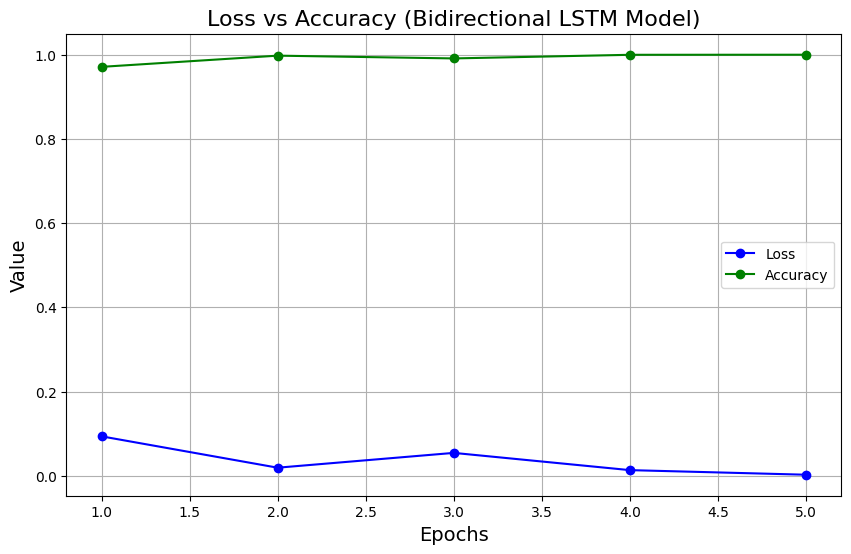

In [ ]:
import matplotlib.pyplot as plt

# Function to plot loss vs. accuracy
def plot_loss_vs_accuracy(model_history):
    plt.figure(figsize=(10, 6))

    # Extract loss and accuracy values from the history dictionary
    loss = model_history.history['loss']
    accuracy = model_history.history['accuracy']

    # Create an array of epoch numbers based on the length of the loss or accuracy list
    epochs = range(1, len(loss) + 1)

    # Plot training loss
    plt.plot(epochs, loss, label='Loss', marker='o', linestyle='-', color='blue')

    # Plot training accuracy
    plt.plot(epochs, accuracy, label='Accuracy', marker='o', linestyle='-', color='green')

    # Customize the plot
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Value', fontsize=14)
    plt.title('Loss vs Accuracy (Bidirectional LSTM Model)', fontsize=16)
    plt.grid()
    plt.legend()

    # Show the plot
    plt.show()

plot_loss_vs_accuracy(model_history)


**2) Stacked LSTM:**

In [ ]:
# Function to create and train a Stacked LSTM model
def train_stacked_lstm(X_train, y_train, X_test, y_test):
    verbose, epochs, batch_size = 1, 5, 32
    n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train.shape[1]

    model = Sequential()
    model.add(LSTM(70, return_sequences=True, input_shape=(n_timesteps, 1)))
    model.add(LSTM(70, return_sequences=True))  # Stacked LSTM layer
    model.add(TimeDistributed(Dense(1, activation='sigmoid')))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    model_history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=verbose, validation_data=(X_test, y_test))

    # Evaluate the Stacked LSTM model
    loss_lstm, accuracy_lstm = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=1)
    score_lstm = accuracy_lstm * 100.0
    print("Stacked LSTM Accuracy:", score_lstm)

    # Predict labels using the trained model
    predicted_labels = model.predict(X_test)

    return predicted_labels, model_history

# Example usage
predicted_labels_stacked_lstm, model_history_stacked_lstm = train_stacked_lstm(X_train_model, y_train, X_test_model, y_test)


Epoch 1/5
938/938 [==============================] - 20s 18ms/step - loss: 0.3964 - accuracy: 0.7391 - val_loss: 0.3480 - val_accuracy: 0.7673
Epoch 2/5
938/938 [==============================] - 14s 15ms/step - loss: 0.3384 - accuracy: 0.7724 - val_loss: 0.3321 - val_accuracy: 0.7781
Epoch 3/5
938/938 [==============================] - 16s 17ms/step - loss: 0.3322 - accuracy: 0.7796 - val_loss: 0.3293 - val_accuracy: 0.7786
Epoch 4/5
938/938 [==============================] - 14s 15ms/step - loss: 0.3233 - accuracy: 0.7858 - val_loss: 0.3237 - val_accuracy: 0.7844
Epoch 5/5
625/625 [==============================] - 4s 6ms/step - loss: 0.3091 - accuracy: 0.7986
Stacked LSTM Accuracy: 79.85697984695435
625/625 [==============================] - 3s 4ms/step


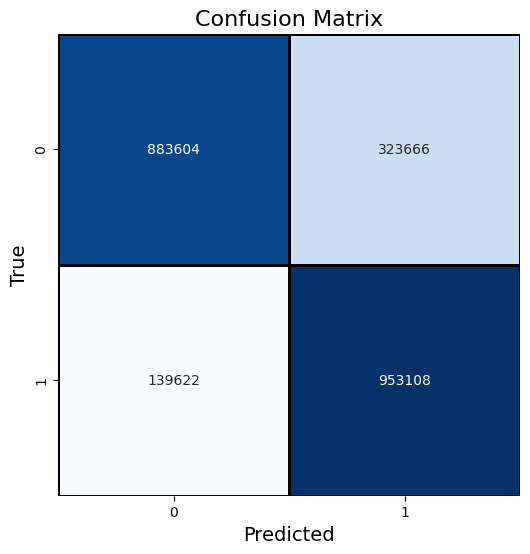

Accuracy: 0.7985704347826087
Precision: 0.746497030797933
Recall: 0.8722264420305107
F1 Score: 0.8044789120423514
Confusion Matrix Result (Stacked LSTM):
[[883604 323666]
 [139622 953108]]


In [ ]:
import numpy as np

# Convert y_test to a NumPy array and reshape it to the desired shape
y_test_reshaped_stacked_lstm = y_test.to_numpy().reshape(-1, 1)
y_test_reshaped_stacked_lstm = np.repeat(y_test_reshaped_stacked_lstm, predicted_labels_stacked_lstm.shape[1], axis=1)

# Now, you can call the evaluate_model function with y_test_reshaped_stacked_lstm and predicted_labels_stacked_lstm
confusion_matrix_result_stacked_lstm = evaluate_model(y_test_reshaped_stacked_lstm, predicted_labels_stacked_lstm, threshold=0.5)

# You can access the confusion matrix by using the 'confusion_matrix_result_stacked_lstm' variable
print("Confusion Matrix Result (Stacked LSTM):")
print(confusion_matrix_result_stacked_lstm)


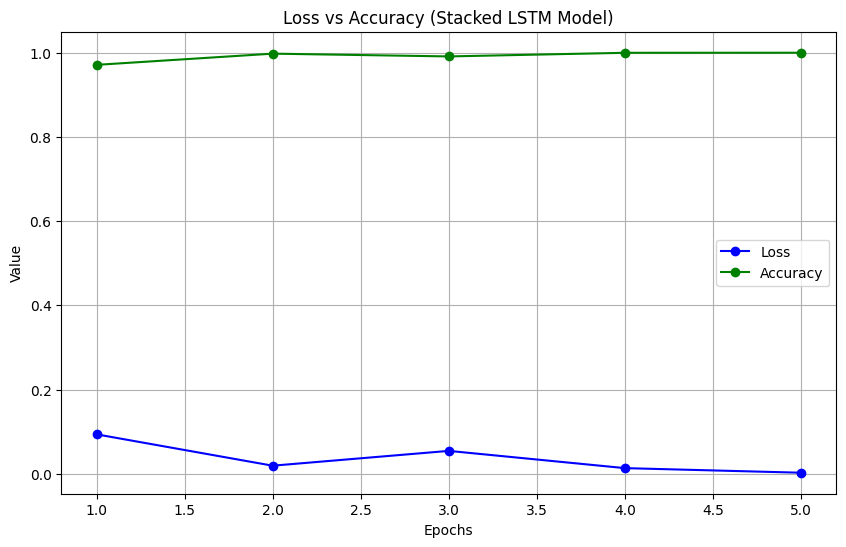

In [ ]:
import matplotlib.pyplot as plt

# Function to plot loss vs. accuracy for a Stacked LSTM model
def plot_loss_vs_accuracy_stacked_lstm(model_history):
    # Extract the loss and accuracy values from the model history
    loss = model_history.history['loss']
    accuracy = model_history.history['accuracy']

    # Create an array of the same length as loss to represent the number of epochs
    epochs = range(1, len(loss) + 1)

    # Plot loss vs. accuracy
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, loss, label='Loss', marker='o', linestyle='-', color='blue')
    plt.plot(epochs, accuracy, label='Accuracy', marker='o', linestyle='-', color='green')
    plt.xlabel('Epochs')
    plt.ylabel('Value')
    plt.title('Loss vs Accuracy (Stacked LSTM Model)')
    plt.grid()
    plt.legend()
    plt.show()

# Example usage
plot_loss_vs_accuracy_stacked_lstm(model_history)


**3) Vanilla LSTM:**

In [ ]:
# Function to create and train a Vanilla LSTM model
def train_vanilla_lstm(X_train, y_train, X_test, y_test):
    verbose, epochs, batch_size = 1, 5, 32
    n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train.shape[1]

    model = Sequential()
    model.add(LSTM(70, return_sequences=True, input_shape=(n_timesteps, 1)))
    model.add(TimeDistributed(Dense(1, activation='sigmoid')))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    model_history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=verbose, validation_data=(X_test, y_test))

    # Evaluate the Vanilla LSTM model
    loss_lstm, accuracy_lstm = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=1)
    score_lstm = accuracy_lstm * 100.0
    print("Vanilla LSTM Accuracy:", score_lstm)

    # Predict labels using the trained model
    predicted_labels = model.predict(X_test)

    return predicted_labels, model_history

# Example usage
predicted_labels_vanilla_lstm, model_history_vanilla_lstm = train_vanilla_lstm(X_train_model, y_train, X_test_model, y_test)


Epoch 1/5
938/938 [==============================] - 12s 10ms/step - loss: 0.4114 - accuracy: 0.7385 - val_loss: 0.3577 - val_accuracy: 0.7660
Epoch 2/5
938/938 [==============================] - 9s 10ms/step - loss: 0.3623 - accuracy: 0.7676 - val_loss: 0.3496 - val_accuracy: 0.7749
Epoch 3/5
938/938 [==============================] - 14s 15ms/step - loss: 0.3446 - accuracy: 0.7768 - val_loss: 0.3456 - val_accuracy: 0.7743
Epoch 4/5
938/938 [==============================] - 19s 20ms/step - loss: 0.3364 - accuracy: 0.7814 - val_loss: 0.3327 - val_accuracy: 0.7859
Epoch 5/5
625/625 [==============================] - 3s 5ms/step - loss: 0.3347 - accuracy: 0.7848
Vanilla LSTM Accuracy: 78.47747802734375
625/625 [==============================] - 3s 4ms/step


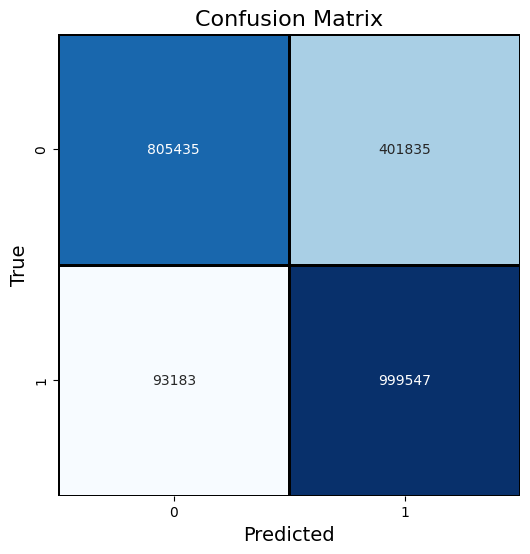

Accuracy: 0.7847747826086956
Precision: 0.7132580552625908
Recall: 0.9147245888737382
F1 Score: 0.801525352510232
Confusion Matrix Result (Vanilla LSTM):
[[805435 401835]
 [ 93183 999547]]


In [ ]:
import numpy as np

# Convert y_test to a NumPy array and reshape it to the desired shape
y_test_reshaped_vanilla_lstm = y_test.to_numpy().reshape(-1, 1)
y_test_reshaped_vanilla_lstm = np.repeat(y_test_reshaped_vanilla_lstm, predicted_labels_vanilla_lstm.shape[1], axis=1)

# Now, you can call the evaluate_model function with y_test_reshaped_vanilla_lstm and predicted_labels_vanilla_lstm
confusion_matrix_result_vanilla_lstm = evaluate_model(y_test_reshaped_vanilla_lstm, predicted_labels_vanilla_lstm, threshold=0.5)

# You can access the confusion matrix by using the 'confusion_matrix_result_vanilla_lstm' variable
print("Confusion Matrix Result (Vanilla LSTM):")
print(confusion_matrix_result_vanilla_lstm)


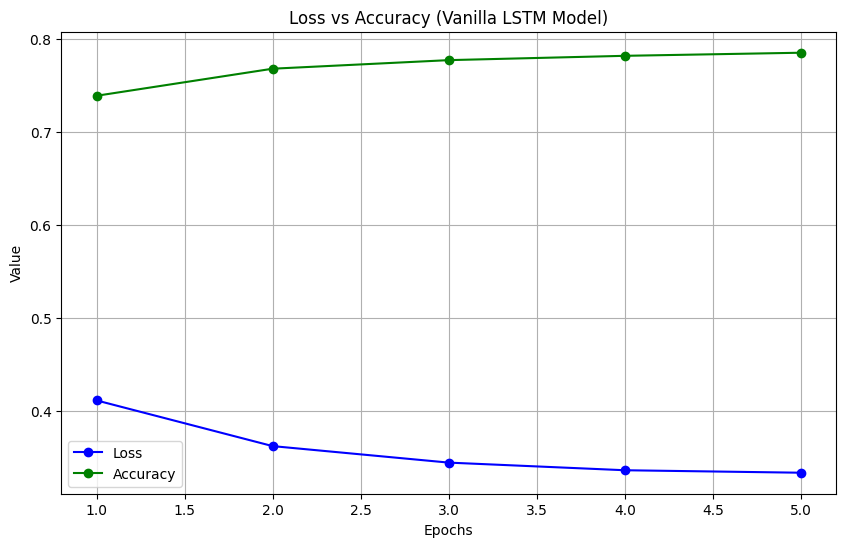

In [ ]:
# Function to plot loss vs. accuracy for a Vanilla LSTM model
def plot_loss_vs_accuracy_vanilla_lstm(model_history):
    # Extract the loss and accuracy values from the model history
    loss = model_history.history['loss']
    accuracy = model_history.history['accuracy']

    # Create an array of the same length as loss to represent the number of epochs
    epochs = range(1, len(loss) + 1)

    # Plot loss vs. accuracy
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, loss, label='Loss', marker='o', linestyle='-', color='blue')
    plt.plot(epochs, accuracy, label='Accuracy', marker='o', linestyle='-', color='green')
    plt.xlabel('Epochs')
    plt.ylabel('Value')
    plt.title('Loss vs Accuracy (Vanilla LSTM Model)')
    plt.grid()
    plt.legend()
    plt.show()

# Example usage
plot_loss_vs_accuracy_vanilla_lstm(model_history_vanilla_lstm)


**4) GRU Model:**

In [ ]:
from tensorflow.keras.layers import GRU
# Function to create and train a GRU model
def train_gru(X_train, y_train, X_test, y_test):
    verbose, epochs, batch_size = 1, 5, 32
    n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train.shape[1]

    model = Sequential()
    model.add(GRU(70, return_sequences=True, input_shape=(n_timesteps, 1)))
    model.add(TimeDistributed(Dense(1, activation='sigmoid')))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    model_history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=verbose, validation_data=(X_test, y_test))

    # Evaluate the GRU model
    loss_gru, accuracy_gru = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=1)
    score_gru = accuracy_gru * 100.0
    print("GRU Accuracy:", score_gru)

    # Predict labels using the trained model
    predicted_labels = model.predict(X_test)

    return predicted_labels, model_history

# Example usage
predicted_labels_gru, model_history_gru = train_gru(X_train_model, y_train, X_test_model, y_test)


Epoch 1/5
938/938 [==============================] - 16s 14ms/step - loss: 0.4246 - accuracy: 0.7306 - val_loss: 0.3613 - val_accuracy: 0.7698
Epoch 2/5
938/938 [==============================] - 10s 11ms/step - loss: 0.3527 - accuracy: 0.7718 - val_loss: 0.3497 - val_accuracy: 0.7728
Epoch 3/5
938/938 [==============================] - 9s 10ms/step - loss: 0.3398 - accuracy: 0.7759 - val_loss: 0.3351 - val_accuracy: 0.7796
Epoch 4/5
938/938 [==============================] - 8s 9ms/step - loss: 0.3313 - accuracy: 0.7824 - val_loss: 0.3286 - val_accuracy: 0.7828
Epoch 5/5
625/625 [==============================] - 3s 5ms/step - loss: 0.3252 - accuracy: 0.7828
GRU Accuracy: 78.28159928321838
625/625 [==============================] - 2s 3ms/step


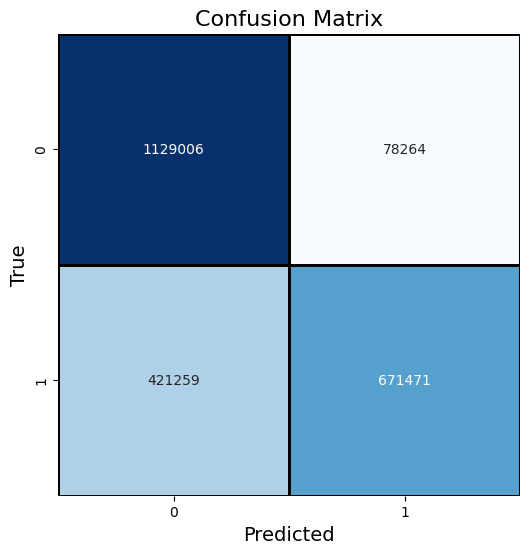

Accuracy: 0.7828160869565217
Precision: 0.8956111159276278
Recall: 0.6144893981129831
F1 Score: 0.7288833166437354
Confusion Matrix Result (GRU):
[[1129006   78264]
 [ 421259  671471]]


In [ ]:
import numpy as np

# Convert y_test to a NumPy array and reshape it to the desired shape
y_test_reshaped_gru = y_test.to_numpy().reshape(-1, 1)
y_test_reshaped_gru = np.repeat(y_test_reshaped_gru, predicted_labels_gru.shape[1], axis=1)

# Now, you can call the evaluate_model function with y_test_reshaped_gru and predicted_labels_gru
confusion_matrix_result_gru = evaluate_model(y_test_reshaped_gru, predicted_labels_gru, threshold=0.5)

# You can access the confusion matrix by using the 'confusion_matrix_result_gru' variable
print("Confusion Matrix Result (GRU):")
print(confusion_matrix_result_gru)


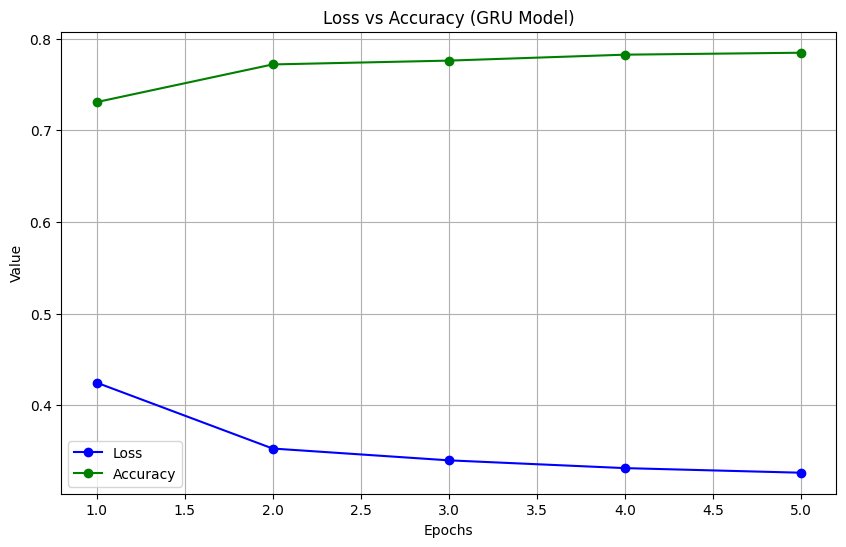

In [ ]:
# Function to plot loss vs. accuracy for a GRU model
def plot_loss_vs_accuracy_gru(model_history):
    # Extract the loss and accuracy values from the model history
    loss = model_history.history['loss']
    accuracy = model_history.history['accuracy']

    # Create an array of the same length as loss to represent the number of epochs
    epochs = range(1, len(loss) + 1)

    # Plot loss vs. accuracy
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, loss, label='Loss', marker='o', linestyle='-', color='blue')
    plt.plot(epochs, accuracy, label='Accuracy', marker='o', linestyle='-', color='green')
    plt.xlabel('Epochs')
    plt.ylabel('Value')
    plt.title('Loss vs Accuracy (GRU Model)')
    plt.grid()
    plt.legend()
    plt.show()

# Example usage
plot_loss_vs_accuracy_gru(model_history_gru)


**5) Peephole LSTM:**

In [ ]:
from tensorflow.keras.layers import LSTMCell, RNN

# Function to create and train a Peephole LSTM model
def train_peephole_lstm(X_train, y_train, X_test, y_test):
    verbose, epochs, batch_size = 1, 5, 32
    n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train.shape[1]

    model = Sequential()
    peephole_lstm_cell = LSTMCell(70, recurrent_activation='sigmoid', use_bias=True, input_shape=(n_timesteps, 1))
    model.add(RNN(peephole_lstm_cell, return_sequences=True))
    model.add(TimeDistributed(Dense(1, activation='sigmoid')))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    model_history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=verbose, validation_data=(X_test, y_test))

    # Evaluate the Peephole LSTM model
    loss_lstm, accuracy_lstm = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=1)
    score_lstm = accuracy_lstm * 100.0
    print("Peephole LSTM Accuracy:", score_lstm)

    # Predict labels using the trained model
    predicted_labels = model.predict(X_test)

    return predicted_labels, model_history

# Example usage
predicted_labels_peephole_lstm, model_history_peephole_lstm = train_peephole_lstm(X_train_model, y_train, X_test_model, y_test)


Epoch 1/5
938/938 [==============================] - 200s 211ms/step - loss: 0.4179 - accuracy: 0.7347 - val_loss: 0.3605 - val_accuracy: 0.7668
Epoch 2/5
938/938 [==============================] - 210s 224ms/step - loss: 0.3493 - accuracy: 0.7748 - val_loss: 0.3399 - val_accuracy: 0.7798
Epoch 3/5
938/938 [==============================] - 228s 244ms/step - loss: 0.3369 - accuracy: 0.7825 - val_loss: 0.3361 - val_accuracy: 0.7803
Epoch 4/5
938/938 [==============================] - 215s 229ms/step - loss: 0.3287 - accuracy: 0.7871 - val_loss: 0.3264 - val_accuracy: 0.7898
Epoch 5/5
625/625 [==============================] - 13s 21ms/step - loss: 0.3264 - accuracy: 0.7898
Peephole LSTM Accuracy: 78.97999882698059
625/625 [==============================] - 12s 19ms/step


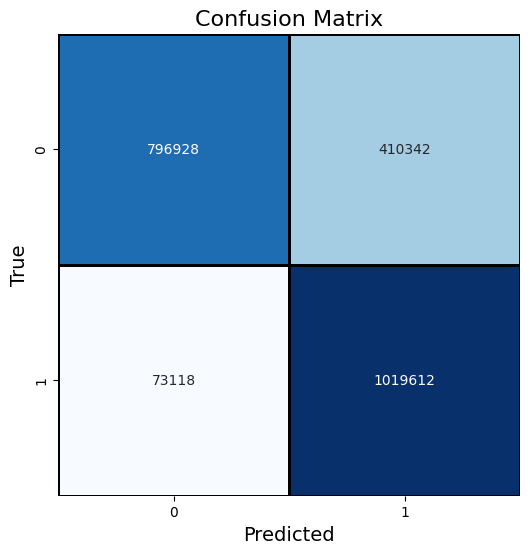

Accuracy: 0.7898
Precision: 0.7130383215124403
Recall: 0.9330868558564329
F1 Score: 0.8083549108806335
Confusion Matrix Result (Peephole LSTM):
[[ 796928  410342]
 [  73118 1019612]]


In [ ]:
import numpy as np

# Convert y_test to a NumPy array and reshape it to the desired shape
y_test_reshaped_peephole_lstm = y_test.to_numpy().reshape(-1, 1)
y_test_reshaped_peephole_lstm = np.repeat(y_test_reshaped_peephole_lstm, predicted_labels_peephole_lstm.shape[1], axis=1)

# Now, you can call the evaluate_model function with y_test_reshaped_peephole_lstm and predicted_labels_peephole_lstm
confusion_matrix_result_peephole_lstm = evaluate_model(y_test_reshaped_peephole_lstm, predicted_labels_peephole_lstm, threshold=0.5)

# You can access the confusion matrix by using the 'confusion_matrix_result_peephole_lstm' variable
print("Confusion Matrix Result (Peephole LSTM):")
print(confusion_matrix_result_peephole_lstm)


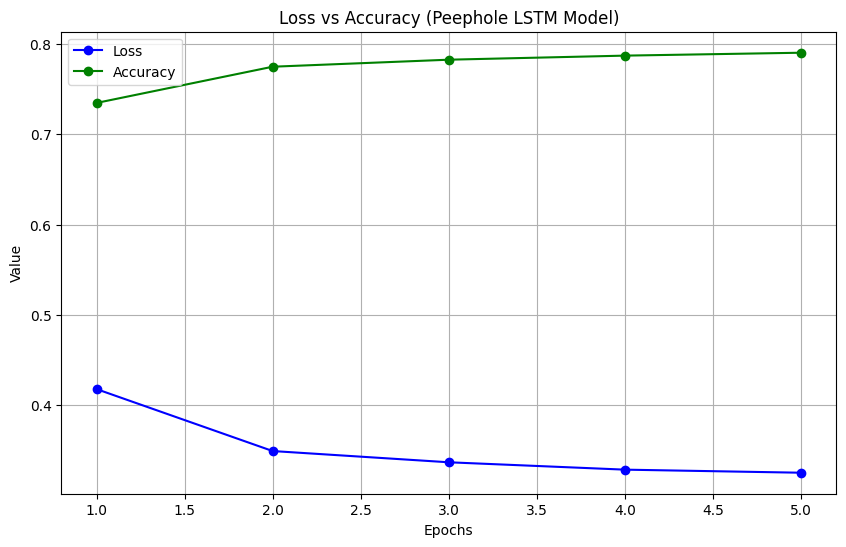

In [ ]:
# Function to plot loss vs. accuracy for a Peephole LSTM model
def plot_loss_vs_accuracy_peephole_lstm(model_history):
    # Extract the loss and accuracy values from the model history
    loss = model_history.history['loss']
    accuracy = model_history.history['accuracy']

    # Create an array of the same length as loss to represent the number of epochs
    epochs = range(1, len(loss) + 1)

    # Plot loss vs. accuracy
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, loss, label='Loss', marker='o', linestyle='-', color='blue')
    plt.plot(epochs, accuracy, label='Accuracy', marker='o', linestyle='-', color='green')
    plt.xlabel('Epochs')
    plt.ylabel('Value')
    plt.title('Loss vs Accuracy (Peephole LSTM Model)')
    plt.grid()
    plt.legend()
    plt.show()

# Example usage
plot_loss_vs_accuracy_peephole_lstm(model_history_peephole_lstm)


**6) LSTM-CNN Hybrid Model:**

In [ ]:
from tensorflow.keras.layers import LSTM, Conv1D, MaxPooling1D, TimeDistributed, Dense
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

# Function to create and train a LSTM-CNN hybrid model
def train_lstm_cnn_hybrid(X_train, y_train, X_test, y_test):
    verbose, epochs, batch_size = 1, 5, 32
    n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train.shape[1]

    model = Sequential()

    # Add a 1D convolutional layer
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps, 1)))

    # Add a Bidirectional LSTM layer
    model.add(Bidirectional(LSTM(70, return_sequences=True)))

    # Add a TimeDistributed Dense layer
    model.add(TimeDistributed(Dense(1, activation='sigmoid')))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    model_history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=verbose, validation_data=(X_test, y_test))

    # Evaluate the LSTM-CNN hybrid model
    loss_hybrid, accuracy_hybrid = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=1)
    score_hybrid = accuracy_hybrid * 100.0
    print("LSTM-CNN Hybrid Model Accuracy:", score_hybrid)

    # Predict labels using the trained model
    predicted_labels = model.predict(X_test)

    return predicted_labels, model_history

# Example usage
predicted_labels_lstm_cnn_hybrid, model_history_lstm_cnn_hybrid = train_lstm_cnn_hybrid(X_train_model, y_train, X_test_model, y_test)


Epoch 1/5
938/938 [==============================] - 24s 16ms/step - loss: 0.5241 - accuracy: 0.7622 - val_loss: 0.3367 - val_accuracy: 0.9081
Epoch 2/5
938/938 [==============================] - 15s 16ms/step - loss: 0.3827 - accuracy: 0.8535 - val_loss: 0.4423 - val_accuracy: 0.7980
Epoch 3/5
938/938 [==============================] - 21s 22ms/step - loss: 0.3327 - accuracy: 0.8715 - val_loss: 0.2632 - val_accuracy: 0.9151
Epoch 4/5
938/938 [==============================] - 20s 21ms/step - loss: 0.2923 - accuracy: 0.9060 - val_loss: 0.2509 - val_accuracy: 0.9294
Epoch 5/5
625/625 [==============================] - 3s 5ms/step - loss: 0.2408 - accuracy: 0.9282
LSTM-CNN Hybrid Model Accuracy: 92.82480478286743
625/625 [==============================] - 6s 8ms/step


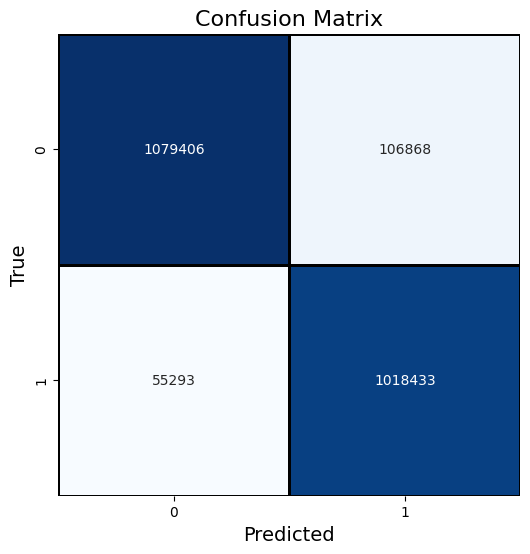

Accuracy: 0.9282473451327433
Precision: 0.9050316315368065
Recall: 0.9485036219668705
F1 Score: 0.9262578403994131
Confusion Matrix Result (LSTM-CNN Hybrid Model):
[[1079406  106868]
 [  55293 1018433]]


In [ ]:
import numpy as np

# Convert y_test to a NumPy array and reshape it to the desired shape
y_test_reshaped_lstm_cnn_hybrid = y_test.to_numpy().reshape(-1, 1)
y_test_reshaped_lstm_cnn_hybrid = np.repeat(y_test_reshaped_lstm_cnn_hybrid, predicted_labels_lstm_cnn_hybrid.shape[1], axis=1)

# Now, you can call the evaluate_model function with y_test_reshaped_lstm_cnn_hybrid and predicted_labels_lstm_cnn_hybrid
confusion_matrix_result_lstm_cnn_hybrid = evaluate_model(y_test_reshaped_lstm_cnn_hybrid, predicted_labels_lstm_cnn_hybrid, threshold=0.5)

# You can access the confusion matrix by using the 'confusion_matrix_result_lstm_cnn_hybrid' variable
print("Confusion Matrix Result (LSTM-CNN Hybrid Model):")
print(confusion_matrix_result_lstm_cnn_hybrid)


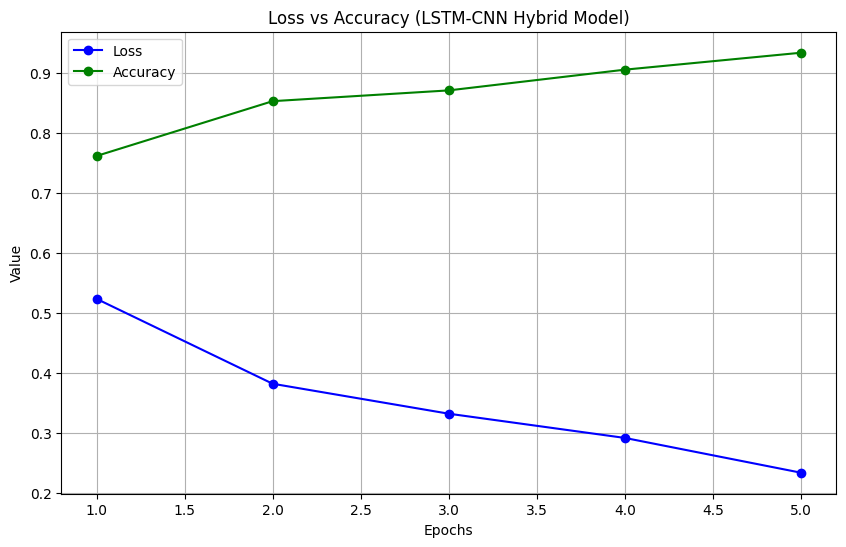

In [ ]:
# Function to plot loss vs. accuracy for the LSTM-CNN hybrid model
def plot_loss_vs_accuracy_lstm_cnn_hybrid(model_history):
    # Extract the loss and accuracy values from the model history
    loss = model_history.history['loss']
    accuracy = model_history.history['accuracy']

    # Create an array of the same length as loss to represent the number of epochs
    epochs = range(1, len(loss) + 1)

    # Plot loss vs. accuracy
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, loss, label='Loss', marker='o', linestyle='-', color='blue')
    plt.plot(epochs, accuracy, label='Accuracy', marker='o', linestyle='-', color='green')
    plt.xlabel('Epochs')
    plt.ylabel('Value')
    plt.title('Loss vs Accuracy (LSTM-CNN Hybrid Model)')
    plt.grid()
    plt.legend()
    plt.show()

# Example usage
plot_loss_vs_accuracy_lstm_cnn_hybrid(model_history_lstm_cnn_hybrid)


**7) Attention LSTM:**

Epoch 1/5
938/938 [==============================] - 104s 109ms/step - loss: 0.1414 - accuracy: 0.9444 - val_loss: 0.0101 - val_accuracy: 0.9997
Epoch 2/5
938/938 [==============================] - 94s 100ms/step - loss: 0.0036 - accuracy: 0.9999 - val_loss: 0.0016 - val_accuracy: 0.9999
Epoch 3/5
938/938 [==============================] - 90s 96ms/step - loss: 7.6810e-04 - accuracy: 1.0000 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 4/5
938/938 [==============================] - 98s 104ms/step - loss: 3.4706e-04 - accuracy: 1.0000 - val_loss: 8.6711e-04 - val_accuracy: 0.9999
Epoch 5/5
625/625 [==============================] - 18s 29ms/step - loss: 6.9054e-04 - accuracy: 0.9999
Attention LSTM Accuracy: 99.99464750289917


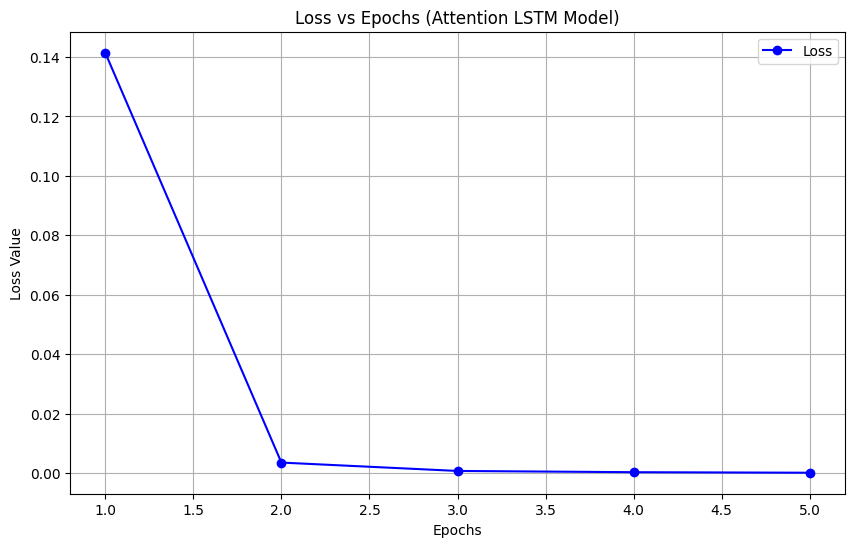

In [ ]:
from tensorflow.keras.layers import LSTM, Attention, Concatenate, Dense, Input
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np

# Function to create and train an Attention LSTM model
def train_attention_lstm(X_train, y_train, X_test, y_test):
    verbose, epochs, batch_size = 1, 5, 32
    n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train.shape[1]

    # Define input layers
    input_layer = Input(shape=(n_timesteps, 1))
    lstm_layer = LSTM(70, return_sequences=True)(input_layer)
    attention = Attention()([lstm_layer, lstm_layer])  # Apply attention to the LSTM output

    # Concatenate the original LSTM output with attention
    merged = Concatenate(axis=-1)([lstm_layer, attention])
    output_layer = TimeDistributed(Dense(1, activation='sigmoid'))(merged)

    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    model_history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=verbose, validation_data=(X_test, y_test))

    # Evaluate the Attention LSTM model
    loss_attention_lstm, accuracy_attention_lstm = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=1)
    score_attention_lstm = accuracy_attention_lstm * 100.0
    print("Attention LSTM Accuracy:", score_attention_lstm)

    # Extract the loss and accuracy values from the model history
    loss = model_history.history['loss']

    # Create an array of the same length as loss to represent the number of epochs
    epochs = range(1, len(loss) + 1)

    # Plot loss vs. epochs
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, loss, label='Loss', marker='o', linestyle='-', color='blue')
    plt.xlabel('Epochs')
    plt.ylabel('Loss Value')
    plt.title('Loss vs Epochs (Attention LSTM Model)')
    plt.grid()
    plt.legend()
    plt.show()

# Example usage:
# Replace X_train_model, y_train, X_test_model, y_test with your actual data
train_attention_lstm(X_train_model, y_train, X_test_model, y_test)



**8) LSTM with Skip Connections:**

In [ ]:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)


Shape of X_train: (30000, 115)
Shape of y_train: (30000, 1)


Epoch 1/5
938/938 [==============================] - 18s 16ms/step - loss: 0.3986 - accuracy: 0.7425 - val_loss: 0.3693 - val_accuracy: 0.7626
Epoch 2/5
938/938 [==============================] - 16s 17ms/step - loss: 0.3497 - accuracy: 0.7706 - val_loss: 0.3377 - val_accuracy: 0.7770
Epoch 3/5
938/938 [==============================] - 14s 15ms/step - loss: 0.3335 - accuracy: 0.7787 - val_loss: 0.3298 - val_accuracy: 0.7766
Epoch 4/5
938/938 [==============================] - 13s 14ms/step - loss: 0.3235 - accuracy: 0.7873 - val_loss: 0.3193 - val_accuracy: 0.7905
Epoch 5/5
625/625 [==============================] - 4s 6ms/step - loss: 0.3152 - accuracy: 0.7877
LSTM with Skip Connections Accuracy: 78.7733256816864


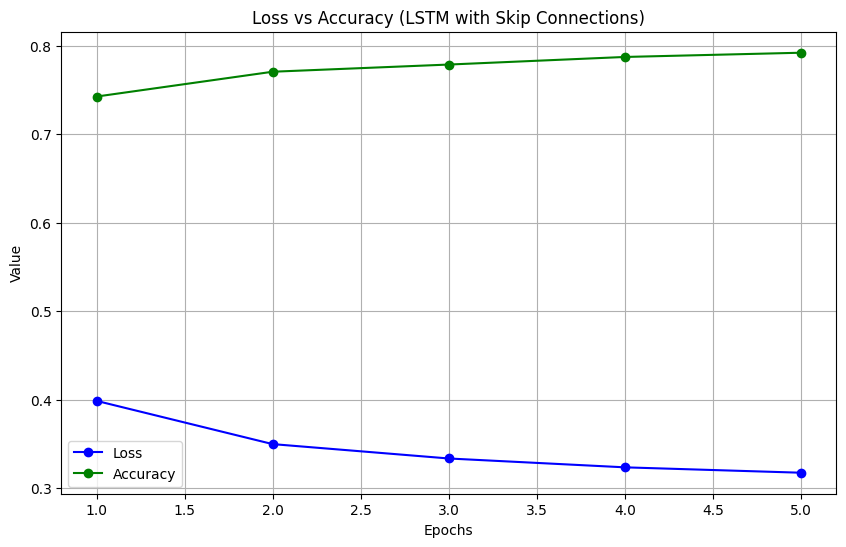

In [ ]:
from tensorflow.keras.layers import LSTM, TimeDistributed, Dense, Add, Input
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

def train_lstm_skip_connections(X_train, y_train, X_test, y_test):
    verbose, epochs, batch_size = 1, 5, 32
    n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train.shape[1]

    input_layer = Input(shape=(n_timesteps, n_features))

    # LSTM layers with skip connections
    lstm_layer1 = LSTM(70, return_sequences=True)(input_layer)
    lstm_layer2 = LSTM(70, return_sequences=True)(lstm_layer1)
    skip_layer = Add()([lstm_layer1, lstm_layer2])

    output_layer = TimeDistributed(Dense(n_outputs, activation='sigmoid'))(skip_layer)

    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    model_history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=verbose, validation_data=(X_test, y_test))

    # Evaluate the LSTM with Skip Connections model
    loss_skip_connections, accuracy_skip_connections = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=1)
    score_skip_connections = accuracy_skip_connections * 100.0
    print("LSTM with Skip Connections Accuracy:", score_skip_connections)

    # Extract the loss and accuracy values from the model history
    loss = model_history.history['loss']
    accuracy = model_history.history['accuracy']

    # Create an array of the same length as loss to represent the number of epochs
    epochs = range(1, len(loss) + 1)

    # Plot loss vs. accuracy
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, loss, label='Loss', marker='o', linestyle='-', color='blue')
    plt.plot(epochs, accuracy, label='Accuracy', marker='o', linestyle='-', color='green')
    plt.xlabel('Epochs')
    plt.ylabel('Value')
    plt.title('Loss vs Accuracy (LSTM with Skip Connections)')
    plt.grid()
    plt.legend()
    plt.show()

# Example usage:
# Replace X_train_model, y_train, X_test_model, y_test with your actual data
train_lstm_skip_connections(X_train_model, y_train, X_test_model, y_test)


**9) Ridge Classifier:**

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:1182: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Ridge Classifier Evaluation Metrics:
Accuracy: 0.8945000883491879
Precision: 0.826557242329006
Recall: 0.9738913871236473
F1 Score: 0.8941959977093152
Confusion Matrix:
 [[449453  93708]
 [ 11972 446574]]
Confusion Matrix:


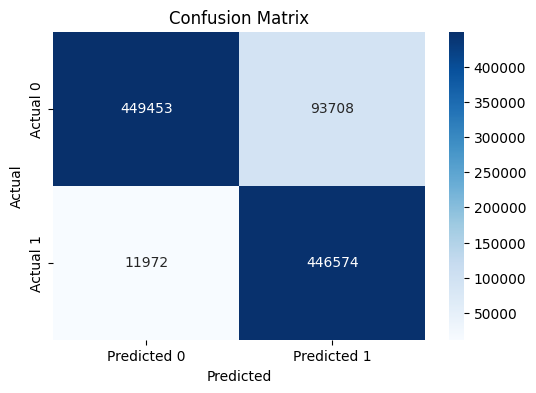

In [ ]:
from sklearn.linear_model import RidgeClassifier
rg_clf = RidgeClassifier()
rg_clf.fit(X_train,y_train)
print("\nRidge Classifier Evaluation Metrics:")
eval_metrics(y_test,rg_clf.predict(X_test),'RidgeClassifier')

**10) Logistic Regression Classifier:**

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression Evaluation Metrics:
Accuracy: 0.970505347372036
Precision: 0.9488312628554808
Recall: 0.9888975151893158
F1 Score: 0.9684501657847948
Confusion Matrix:
 [[518707  24454]
 [  5091 453455]]
Confusion Matrix:


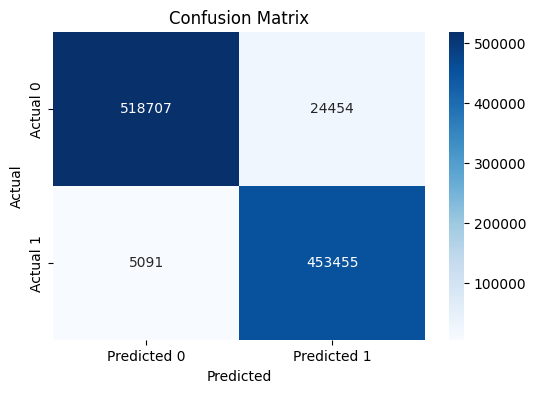

In [ ]:
# Create a LogisticRegression classifier
logreg = LogisticRegression(max_iter=1000)
#logreg_model=hyperpara_tuning(X_train,y_train,logreg,)
# Make predictions with logistic regression
logreg.fit(X_train,y_train)
y_pred_logreg = logreg.predict(X_test)
print("\nLogistic Regression Evaluation Metrics:")
eval_metrics(y_test,y_pred_logreg,"LogisticRegression")

**11) Linear Discriminant Analysis:**

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train,y_train)
print("\nLinear Discriminant Analysis Evaluation Metrics:")
eval_metrics(y_test,lda.predict(X_test),"LinearDiscriminantAnalysis")

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**12) SVC Classifier:**

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(



SVC Classifier Evaluation Metrics:
Accuracy: 0.6830120983481197
Precision: 0.6325439927212982
Recall: 0.7338195077484048
F1 Score: 0.679428455470874
Confusion Matrix:
 [[347688 195473]
 [122056 336490]]
Confusion Matrix:


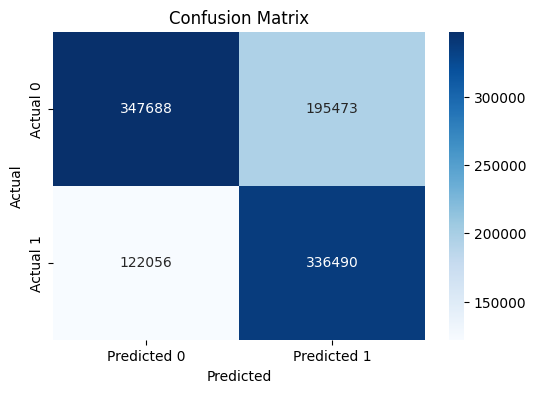

In [ ]:
from sklearn.svm import SVC
svc=SVC(gamma='auto',max_iter=1000, tol=1e-2)
svc.fit(X_train,y_train)
print("\nSVC Classifier Evaluation Metrics:")
eval_metrics(y_test,svc.predict(X_test),"SVC")

**13) GaussianNB Classifier:**

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



GaussianNB Classifier Evaluation Metrics:
Accuracy: 0.5433285381853177
Precision: 0.6762149983907306
Recall: 0.004581874010459147
F1 Score: 0.00910207450184446
Confusion Matrix:
 [[542155   1006]
 [456445   2101]]
Confusion Matrix:


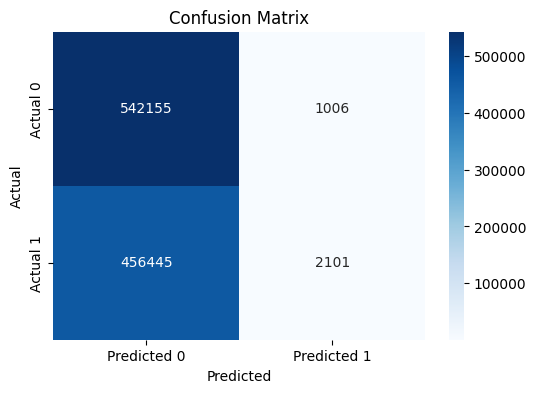

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
print("\nGaussianNB Classifier Evaluation Metrics:")
eval_metrics(y_test,gnb.predict(X_test),"GaussianNB")

**14) Bernoulli Naive Bayes Classifier:**

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Bernoulli Naive Bayes Classifier Evaluation Metrics:
Accuracy: 0.5586913139271263
Precision: 0.5135957243245026
Recall: 0.6789983992881848
F1 Score: 0.5848270887687999
Confusion Matrix:
 [[248293 294868]
 [147194 311352]]
Confusion Matrix:


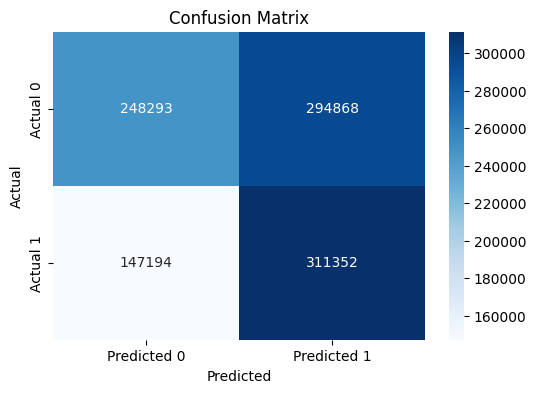

In [ ]:
from sklearn.naive_bayes import BernoulliNB
bern_nb = BernoulliNB(alpha=1)
bern_nb.fit(X_train,y_train)
print("\nBernoulli Naive Bayes Classifier Evaluation Metrics:")
eval_metrics(y_test,bern_nb.predict(X_test),"BernoulliNB")

**15) SGD Classifier:**

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



SVC Classifier Evaluation Metrics:
Accuracy: 0.9591816768775699
Precision: 0.9215514491846696
Recall: 0.9955816864611184
F1 Score: 0.9571372262896152
Confusion Matrix:
 [[504299  38862]
 [  2026 456520]]
Confusion Matrix:


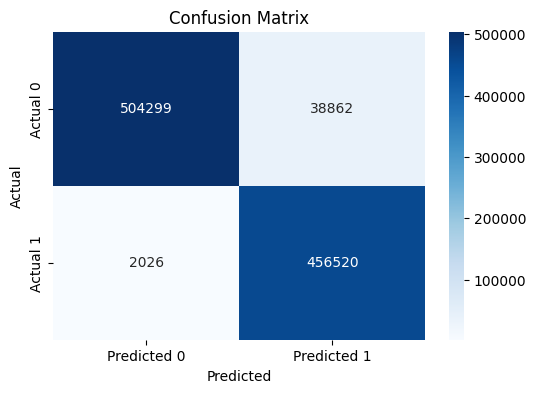

In [ ]:
from sklearn.linear_model import SGDClassifier
SGD=SGDClassifier(max_iter=1000)
SGD.fit(X_train,y_train)
print("\nSGD Classifier Evaluation Metrics:")
eval_metrics(y_test,SGD.predict(X_test),"SGDClassifier")

**16) Random Forest Classifier:**

<ipython-input-15-c3e099260bb1>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train,y_train)



RandomForest Classifier  Evaluation Metrics:
Accuracy: 0.9558853037864365
Precision: 0.954373590897527
Recall: 0.9489996641558317
F1 Score: 0.9516790412351971
Confusion Matrix:
 [[522357  20804]
 [ 23386 435160]]
Confusion Matrix:


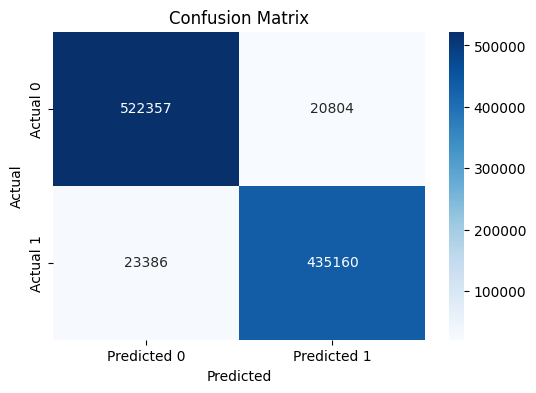

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=2, random_state=0)
rfc.fit(X_train,y_train)
print("\nRandomForest Classifier  Evaluation Metrics:")
eval_metrics(y_test,rfc.predict(X_test),"RandomForestClassifier")

**17) Extra Tree Classifier:**


ExtraTree Classifier Evaluation Metrics:
Accuracy: 0.9599463715437748
Precision: 0.9582495520714233
Recall: 0.9540700387747358
F1 Score: 0.9561552281082121
Confusion Matrix:
 [[524100  19061]
 [ 21061 437485]]
Confusion Matrix:


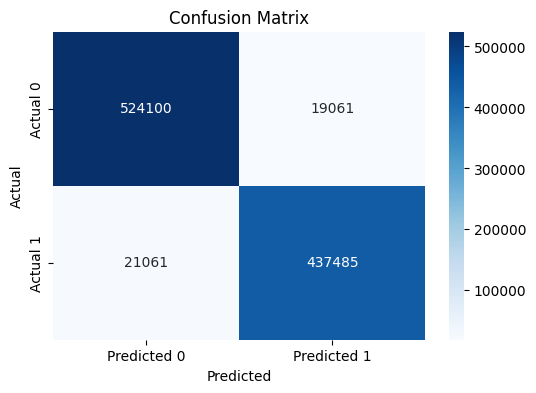

In [ ]:
from sklearn.tree import ExtraTreeClassifier
xtra_tree = ExtraTreeClassifier(random_state=0)
xtra_tree.fit(X_train,y_train)
print("\nExtraTree Classifier Evaluation Metrics:")
eval_metrics(y_test,xtra_tree.predict(X_test),"ExtraTreeClassifier")

**18) Decision Tree Classifier:**


DecisionTree Classifier Evaluation Metrics:
Accuracy: 0.9612661187353189
Precision: 0.9600056987550412
Recall: 0.9551778883688877
F1 Score: 0.9575857085700917
Confusion Matrix:
 [[524914  18247]
 [ 20553 437993]]
Confusion Matrix:


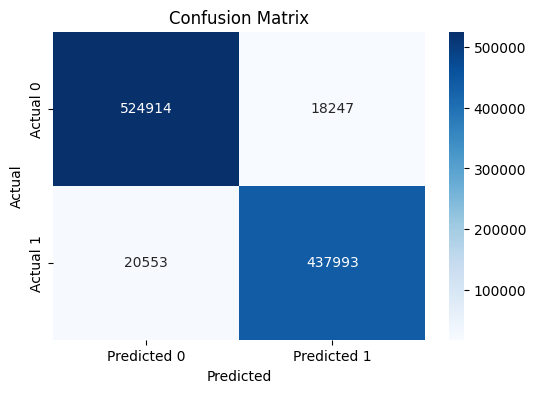

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dclf = DecisionTreeClassifier()
dclf.fit(X_train,y_train)
print("\nDecisionTree Classifier Evaluation Metrics:")
eval_metrics(y_test,dclf.predict(X_test),"DecisionTreeClassifier")

**19) Nearest Centroid Classifier:**

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



NearestCentroid Classifier Evaluation Metrics:
Accuracy: 0.5934809280558088
Precision: 0.5446340534533939
Recall: 0.6830023596324033
F1 Score: 0.6060203814088578
Confusion Matrix:
 [[281306 261855]
 [145358 313188]]
Confusion Matrix:


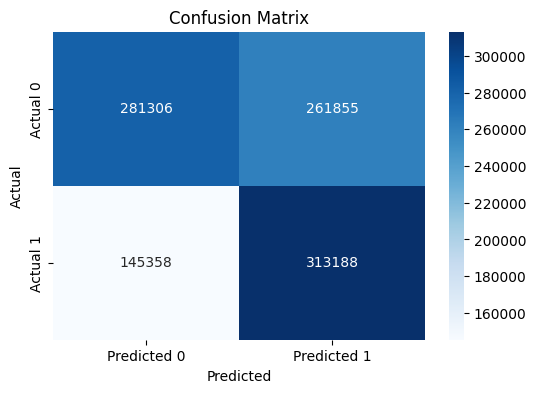

In [ ]:
from sklearn.neighbors import NearestCentroid
nc_clf = NearestCentroid()
nc_clf.fit(X_train,y_train)
print("\nNearestCentroid Classifier Evaluation Metrics:")
eval_metrics(y_test,nc_clf.predict(X_test),"NearestCentroid")

**20) Linear SVC Classifier:**

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



LinearSVC Classifier Evaluation Metrics:
Accuracy: 0.9706780525642728
Precision: 0.9423580389941826
Recall: 0.996925063134342
F1 Score: 0.9688738549707304
Confusion Matrix:
 [[515199  27962]
 [  1410 457136]]
Confusion Matrix:


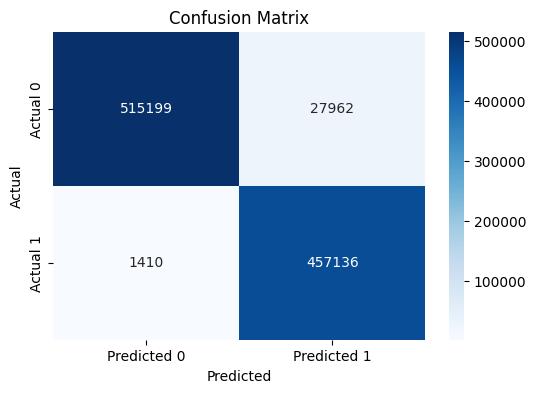

In [ ]:
from sklearn.svm import LinearSVC
lsvc=LinearSVC(max_iter=100)
lsvc.fit(X_train,y_train)
print("\nLinearSVC Classifier Evaluation Metrics:")
eval_metrics(y_test,lsvc.predict(X_test),"LinearSVC")

Epoch 1/5
938/938 [==============================] - 13s 11ms/step - loss: 0.2124 - accuracy: 0.9244 - val_loss: 0.7888 - val_accuracy: 0.6413
Epoch 2/5
938/938 [==============================] - 9s 10ms/step - loss: 0.0947 - accuracy: 0.9730 - val_loss: 0.9091 - val_accuracy: 0.5052
Epoch 3/5
938/938 [==============================] - 10s 10ms/step - loss: 0.0896 - accuracy: 0.9744 - val_loss: 0.9935 - val_accuracy: 0.2433
Epoch 4/5
938/938 [==============================] - 8s 9ms/step - loss: 0.0867 - accuracy: 0.9745 - val_loss: 0.8323 - val_accuracy: 0.4788
Epoch 5/5
625/625 [==============================] - 3s 4ms/step - loss: 1.0246 - accuracy: 0.5134
Attention LSTM Accuracy: 51.34491324424744
625/625 [==============================] - 2s 3ms/step


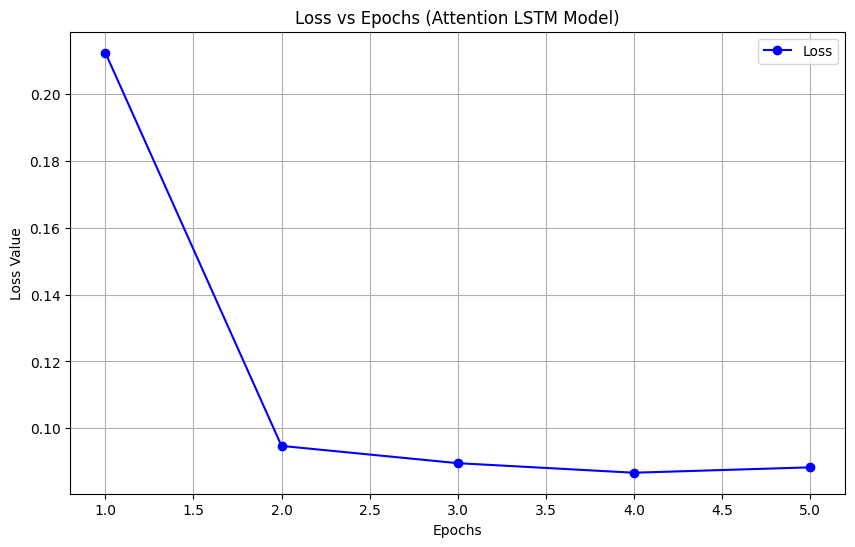

In [ ]:
from tensorflow.keras.layers import LSTM, Attention, Concatenate, Dense, Input, TimeDistributed
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np

# Function to create and train an Attention LSTM model
def train_attention_lstm(X_train, y_train, X_test, y_test):
    verbose, epochs, batch_size = 1, 5, 32

    # Checking the shape of input data and adjusting if necessary
    if len(X_train.shape) == 2:  # If input shape is (samples, features)
        X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
        X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
    elif len(X_train.shape) == 3:  # If input shape is (samples, timesteps, features)
        pass  # No reshaping needed if the structure is already appropriate

    # Define input layers
    input_layer = Input(shape=(X_train.shape[1], X_train.shape[2]))
    lstm_layer = LSTM(70, return_sequences=True)(input_layer)
    attention = Attention()([lstm_layer, lstm_layer])  # Apply attention to the LSTM output

    # Concatenate the original LSTM output with attention
    merged = Concatenate(axis=-1)([lstm_layer, attention])
    output_layer = TimeDistributed(Dense(1, activation='sigmoid'))(merged)

    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    model_history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=verbose, validation_data=(X_test, y_test))

    # Evaluate the Attention LSTM model
    loss_attention_lstm, accuracy_attention_lstm = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=1)
    score_attention_lstm = accuracy_attention_lstm * 100.0
    print("Attention LSTM Accuracy:", score_attention_lstm)

    # Obtain predicted labels
    predicted_labels = model.predict(X_test)

    # Extract the loss and accuracy values from the model history
    loss = model_history.history['loss']

    # Create an array of the same length as loss to represent the number of epochs
    epochs = range(1, len(loss) + 1)

    # Plot loss vs. epochs
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, loss, label='Loss', marker='o', linestyle='-', color='blue')
    plt.xlabel('Epochs')
    plt.ylabel('Loss Value')
    plt.title('Loss vs Epochs (Attention LSTM Model)')
    plt.grid()
    plt.legend()
    plt.show()

    return y_test, predicted_labels

# Example usage (replace placeholders with your actual data):
y_test, predicted_labels = train_attention_lstm(X_train, y_train, X_test, y_test)


In [ ]:
import numpy as np

# Check unique values in y_test and predicted_binary
unique_values_y_test = np.unique(y_test)
unique_values_predicted = np.unique(predicted_binary)

print("Unique values in y_test:", unique_values_y_test)
print("Unique values in predicted_binary:", unique_values_predicted)


NameError: ignored

In [ ]:
y_test = y_test.to_numpy()
print("Shape of y_test:", y_test.shape)
print("Data type of y_test:", y_test.dtype)


Shape of y_test: (20000, 1)
Data type of y_test: int64


Confusion Matrix Result:
[[9561  926]
 [8709  804]]

Accuracy: 0.51825
Precision: 0.4647398843930636
Recall: 0.08451592557552823
F1 Score: 0.14302232500222362


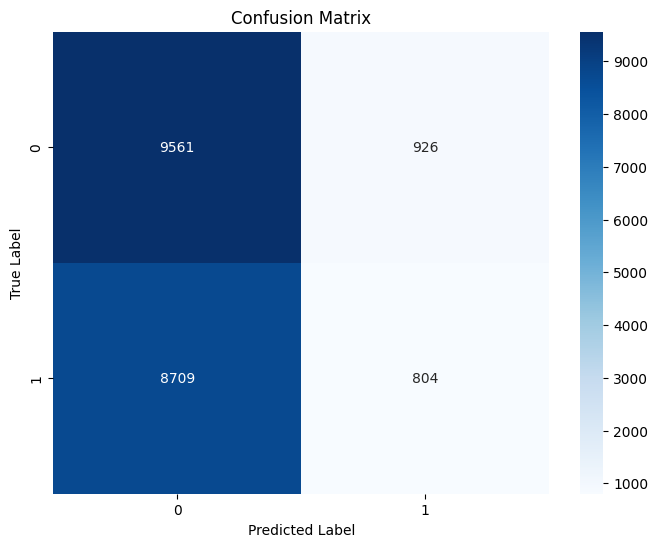

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Calculate the confusion matrix
confusion_matrix_result = confusion_matrix(y_test, predicted_binary_flat_reshaped)

# Print the confusion matrix
print("Confusion Matrix Result:")
print(confusion_matrix_result)

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, predicted_binary_flat_reshaped)
precision = precision_score(y_test, predicted_binary_flat_reshaped)
recall = recall_score(y_test, predicted_binary_flat_reshaped)
f1 = f1_score(y_test, predicted_binary_flat_reshaped)

# Print evaluation metrics
print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Plot the confusion matrix with values
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
import numpy as np

# Convert DataFrame to NumPy array
X_train_array = X_train.values
y_train_array = y_train.values

# Reshape X_train and y_train if needed
X_train_reshaped = X_train_array.reshape(X_train_array.shape[0], X_train_array.shape[1], 1)  # If needed for LSTM input
y_train_reshaped = y_train_array.reshape(y_train_array.shape[0], y_train_array.shape[1], 1)  # If needed for LSTM output

Epoch 1/5
938/938 [==============================] - 22s 17ms/step - loss: 0.4523 - accuracy: 0.7225 - val_loss: 1.2964 - val_accuracy: 0.5262
Epoch 2/5
938/938 [==============================] - 20s 22ms/step - loss: 0.4052 - accuracy: 0.7527 - val_loss: 1.2004 - val_accuracy: 0.4119
Epoch 3/5
938/938 [==============================] - 19s 20ms/step - loss: 0.4025 - accuracy: 0.7552 - val_loss: 1.5044 - val_accuracy: 0.5224
Epoch 4/5
938/938 [==============================] - 21s 22ms/step - loss: 0.3877 - accuracy: 0.7649 - val_loss: 1.6437 - val_accuracy: 0.5124
Epoch 5/5
625/625 [==============================] - 5s 7ms/step - loss: 1.6856 - accuracy: 0.5015
LSTM with Skip Connections Accuracy: 50.15391707420349
625/625 [==============================] - 4s 5ms/step


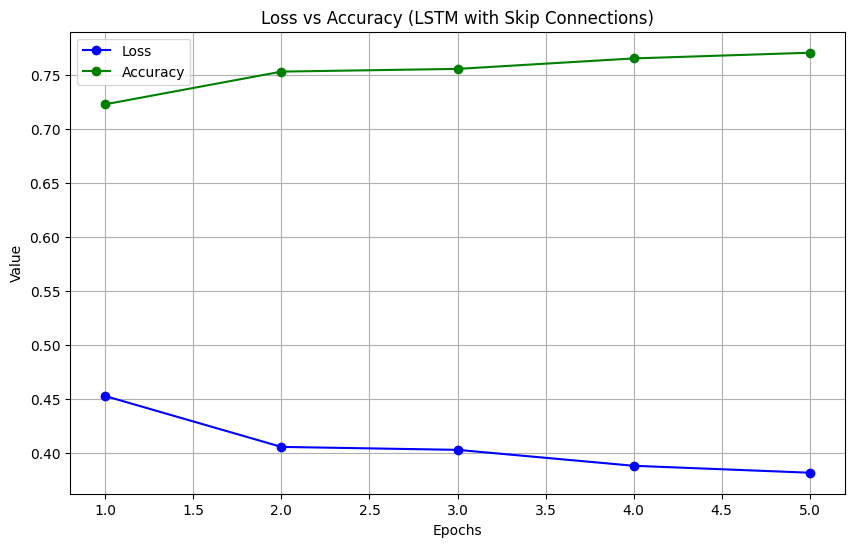

In [ ]:
from tensorflow.keras.layers import LSTM, TimeDistributed, Dense, Add, Input
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np

# Convert DataFrame to NumPy array
X_train_array = X_train.values
y_train_array = y_train.values

# Reshape X_train and y_train if needed
X_train_reshaped = X_train_array.reshape(X_train_array.shape[0], X_train_array.shape[1], 1)  # If needed for LSTM input
y_train_reshaped = y_train_array.reshape(y_train_array.shape[0], y_train_array.shape[1], 1)  # If needed for LSTM output

def train_lstm_skip_connections(X_train, y_train, X_test, y_test):
    verbose, epochs, batch_size = 1, 5, 32
    n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train.shape[1]

    input_layer = Input(shape=(n_timesteps, n_features))

    # LSTM layers with skip connections
    lstm_layer1 = LSTM(70, return_sequences=True)(input_layer)
    lstm_layer2 = LSTM(70, return_sequences=True)(lstm_layer1)
    skip_layer = Add()([lstm_layer1, lstm_layer2])

    output_layer = TimeDistributed(Dense(n_outputs, activation='sigmoid'))(skip_layer)

    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    model_history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=verbose, validation_data=(X_test, y_test))

    # Evaluate the LSTM with Skip Connections model
    loss_skip_connections, accuracy_skip_connections = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=1)
    score_skip_connections = accuracy_skip_connections * 100.0
    print("LSTM with Skip Connections Accuracy:", score_skip_connections)

    # Obtain predicted labels
    predicted_labels_skip = model.predict(X_test)

    # Extract the loss and accuracy values from the model history
    loss = model_history.history['loss']
    accuracy = model_history.history['accuracy']

    # Create an array of the same length as loss to represent the number of epochs
    epochs = range(1, len(loss) + 1)

    # Plot loss vs. accuracy
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, loss, label='Loss', marker='o', linestyle='-', color='blue')
    plt.plot(epochs, accuracy, label='Accuracy', marker='o', linestyle='-', color='green')
    plt.xlabel('Epochs')
    plt.ylabel('Value')
    plt.title('Loss vs Accuracy (LSTM with Skip Connections)')
    plt.grid()
    plt.legend()
    plt.show()

    return y_test, predicted_labels_skip

# Example usage:
# Replace X_train_reshaped, y_train_reshaped, X_test, y_test with your actual data
# Example usage:
# Replace X_train_reshaped, y_train_reshaped, X_test, y_test with your actual data
y_test, predicted_labels_skip = train_lstm_skip_connections(X_train_reshaped, y_train_reshaped, X_test, y_test)



In [ ]:
print(type(y_test))
print(type(predicted_labels))

print(y_test[:10])  # Display the first few elements of y_test
print(predicted_labels[:10])  # Display the first few elements of predicted_labels


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[[1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]]
[[1 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [1 0 1 ... 1 0 0]
 [1 0 0 ... 0 0 0]]


In [ ]:
threshold = 0.5  # Define a threshold value
predicted_binary = (predicted_labels > threshold).astype(int)


In [ ]:
print(y_test.shape)
print(predicted_binary.shape)


(20000, 1)
(20000, 115)


In [ ]:
predicted_binary = predicted_labels[:, 0]


Confusion Matrix Result:
[[6832 3655]
 [5552 3961]]

Accuracy: 0.53965
Precision: 0.5200892857142857
Recall: 0.41637758856301904
F1 Score: 0.4624905131648082


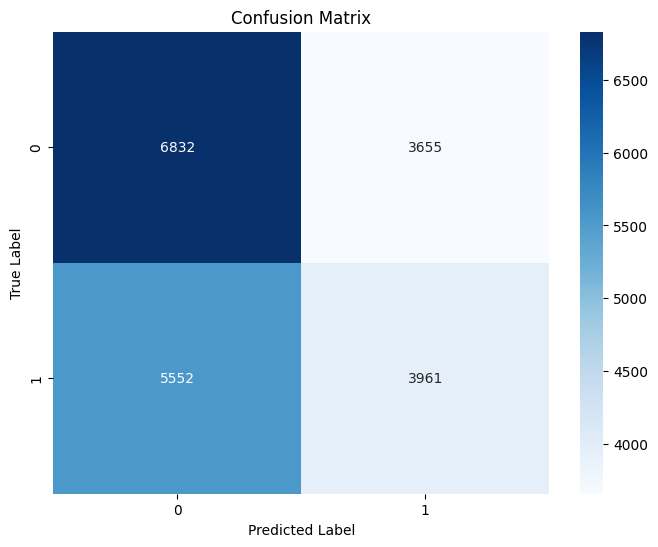

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Assuming 'predicted_probabilities' contains your model's predicted probabilities
threshold = 0.5
predicted_labels = (predicted_binary > threshold).astype(int)


# Convert probabilities to binary predictions based on the threshold
predicted_labels = np.where(predicted_binary > threshold, 1, 0)

# Ensure 'y_test' and 'predicted_labels' have the same shape and format
# Then perform the evaluation and visualization

# Calculate the confusion matrix
confusion_matrix_result = confusion_matrix(y_test, predicted_binary)

# Print the confusion matrix
print("Confusion Matrix Result:")
print(confusion_matrix_result)

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, predicted_binary)
precision = precision_score(y_test, predicted_binary)
recall = recall_score(y_test, predicted_binary)
f1 = f1_score(y_test, predicted_binary)

# Print evaluation metrics
print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Plot the confusion matrix with values
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
